<a href="https://colab.research.google.com/github/junggeyy/DeepLearning/blob/main/logistic_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing a Logistic Regression Classifier

This notebook demonstrates the implementation of a Logistic Regression Classifier model using PyTorch. It covers loading and visualizing a dataset, building the classifier class, training the model, evaluating its accuracy, and visualizing the decision boundary.

### Install Libraries

In [ ]:
!pip install torch

### 1. Loading the Dataset

In [2]:
import pandas as pd

df = pd.read_csv("perceptron_toydata.txt", sep = "\t", header=None)
df

,0,1,2
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [4]:
X_train = df[[0,1]].values
y_train = df[2].values

Here, we normalize the dataset to..

In [11]:
# normalizing the dataset
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

### 2. Visualizing the dataset

In [12]:
import matplotlib.pyplot as plt

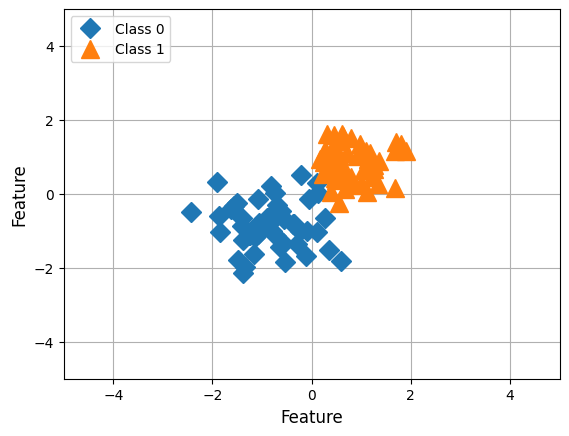

In [13]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.grid()
plt.show()


### 3. Implementation

In [23]:
import torch

class LogisticRegression(torch.nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.linear = torch.nn.Linear(in_features=num_features, out_features=1)

  def forward(self, x):
    logits = self.linear(x)  # weighted sum(z) = x.matmul(w.T) + b
    prob = torch.sigmoid(logits) # sigmoid output(a) || probablitiy

    return prob

In [24]:
# evaluating prediction
torch.manual_seed(1)

model = LogisticRegression(num_features=2)
x = torch.tensor([1.1, 2.1])

with torch.no_grad():
  proba = model(x)

print(proba)

tensor([0.4033])


### 4. Defining a DataLoader

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

  def __init__(self, X, y):
    self.features = torch.tensor(X, dtype=torch.float32)
    self.labels = torch.tensor(y, dtype=torch.float32)

  # used by DataLoader to retrieve a single item at specified index
  def __getitem__(self, index):
    x = self.features[index]
    y = self.labels[index]
    return x, y

  # used by DataLoader to know how many samples exist
  def __len__(self):
    return self.labels.shape[0]

train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=10,
    shuffle=True,
)

### 5. Training the Model

Here, we first initalize our model and optimizer. We are using SGD and calling model.parameters() which returns all the relevant model parameters, weights and the bias unit, that the SGD optimizer needs to update and lr is the learning rate, set as 0.05.

*for batch_idx, (features, class_labels) in enumerate(train_loader)* --> train_loader is a DataLoader object which, on each iteration, yeilds a tuple where each sample's features and label are matched by index.

In [53]:
import torch.nn.functional as F

torch.manual_seed(1)
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 20

for epoch in range(num_epochs):

  # set the model into training mode
  model = model.train()
  for batch_idx, (features, class_labels) in enumerate(train_loader):

    prob = model(features)
    loss = F.binary_cross_entropy(prob, class_labels.view(prob.shape))

    optimizer.zero_grad() # set previous gradient to 0
    loss.backward() # compute all required gradients
    optimizer.step()  # perform parameter updates based on the gradients

    print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
          f' | Batch: {batch_idx:03d}/{len(train_loader):03d}'
          f' | Loss: {loss:.2f}')

Epoch: 001/020 | Batch: 000/010 | Loss: 0.70
Epoch: 001/020 | Batch: 001/010 | Loss: 0.63
Epoch: 001/020 | Batch: 002/010 | Loss: 0.62
Epoch: 001/020 | Batch: 003/010 | Loss: 0.59
Epoch: 001/020 | Batch: 004/010 | Loss: 0.56
Epoch: 001/020 | Batch: 005/010 | Loss: 0.63
Epoch: 001/020 | Batch: 006/010 | Loss: 0.68
Epoch: 001/020 | Batch: 007/010 | Loss: 0.60
Epoch: 001/020 | Batch: 008/010 | Loss: 0.67
Epoch: 001/020 | Batch: 009/010 | Loss: 0.50
Epoch: 002/020 | Batch: 000/010 | Loss: 0.50
Epoch: 002/020 | Batch: 001/010 | Loss: 0.55
Epoch: 002/020 | Batch: 002/010 | Loss: 0.56
Epoch: 002/020 | Batch: 003/010 | Loss: 0.50
Epoch: 002/020 | Batch: 004/010 | Loss: 0.55
Epoch: 002/020 | Batch: 005/010 | Loss: 0.52
Epoch: 002/020 | Batch: 006/010 | Loss: 0.46
Epoch: 002/020 | Batch: 007/010 | Loss: 0.45
Epoch: 002/020 | Batch: 008/010 | Loss: 0.45
Epoch: 002/020 | Batch: 009/010 | Loss: 0.49
Epoch: 003/020 | Batch: 000/010 | Loss: 0.45
Epoch: 003/020 | Batch: 001/010 | Loss: 0.44
Epoch: 003

### 6. Evaluating the results

#### note section starts
*Side-note regarding the prediction which will be used in computing the accuracy*

For simplicility, we are using the probability score from the last mini-batch.

In [29]:
prob

tensor([[0.8227],
        [0.7678],
        [0.9200],
        [0.8670],
        [0.8732],
        [0.0180],
        [0.0572],
        [0.0304],
        [0.8951],
        [0.0121]], grad_fn=<SigmoidBackward0>)

In [30]:
# compute predictions from the last batch's probability scores
prediction = torch.where(prob > 0.5, 1, 0)
prediction

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0]])

Here, we are reshaping our class_labels array into 2D column tensor like our prediction.

*.view()* will reshape class_label to be of shape (10,1) and *.to()* will ensure both have the same data type.

In [31]:
class_labels.view(prediction.shape).to(prediction.dtype)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0]])

#### note section ends

In [48]:
def compute_accuracy(model, dataloader):
  # set model to evaluation mode
  model = model.eval()

  correct_count = 0.0
  total_examples = 0.0

  for idx, (features, class_labels) in enumerate(dataloader):

    with torch.no_grad():
      prob = model(features)
    prediction = torch.where(prob > 0.5, 1, 0)
    label = class_labels.view(prediction.shape).to(prediction.dtype)

    compare = (label == prediction)  # tensor of T/Fs
    correct_count += torch.sum(compare)
    total_examples += len(compare)

  return correct_count / total_examples

In [52]:
training_accuracy = compute_accuracy(model, train_loader)

print(f'Accuracy: {training_accuracy*100}%')

Accuracy: 97.0%


### 7. Visualizing the Dataset

In [54]:
def plot_boundary(model):

    w1 = model.linear.weight[0][0].detach()
    w2 = model.linear.weight[0][1].detach()
    b = model.linear.bias[0].detach()

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

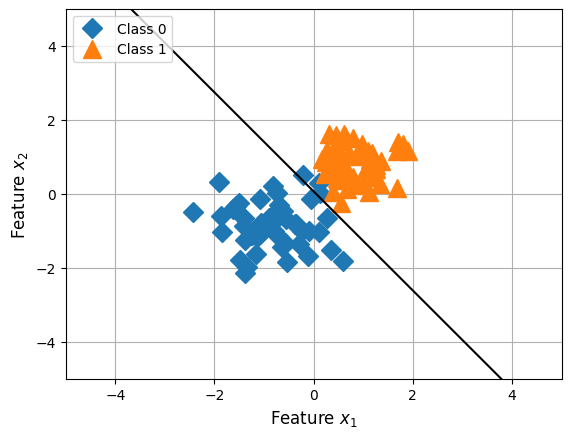

In [55]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(model)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()